# Lab 1 : Spatial Autocorrelation

In this lab, we explore the measurement of spatial autocorrelation by Moran's index. We will use both R in this notebook and a package called GeoDa (installed on the lab computers) to do this. Each has advantages. We suggest you work in this notebook to the point where you might begin to find the code involved a bit bewildering. It's OK if that happens, don't panic, and switch to GeoDa. 

Even if you don't get pushed past your tolerance for code, you are encouraged to also explore the application of these measures using GeoDa.

In [1]:
# We import our libraries here
library(spdep)
library(classInt)
library(rgdal)
library(RColorBrewer)

Loading required package: sp
Loading required package: Matrix
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge')`
rgdal: version: 1.2-8, (SVN revision 663)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.4, released 2017/06/23
 Path to GDAL shared files: /Users/dosullivan/anaconda/envs/rjup/share/gdal
 GDAL does not use iconv for recoding strings.
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Users/dosullivan/anaconda/envs/rjup/share/proj
 Linking to sp version: 1.2-4 


## Read in the data and take a look at it

Read the shape file from the data directory

In [2]:
auck <- readOGR("data/ak-TB-ethnicity-0506.shp", integer64="allow.loss")

OGR data source with driver: ESRI Shapefile 
Source: "data/ak-TB-ethnicity-0506.shp", layer: "ak-TB-ethnicity-0506"
with 318 features
It has 12 fields


In [3]:
# Let's see a summary of our spatial data
summary(auck)

Object of class SpatialPolygonsDataFrame
Coordinates:
      min     max
x 2638999 2713900
y 6449610 6503050
Is projected: TRUE 
proj4string :
[+proj=nzmg +lat_0=-41 +lon_0=173 +x_0=2510000 +y_0=6023150
+datum=nzgd49 +units=m +no_defs +ellps=intl
+towgs84=59.47,-5.04,187.44,0.47,-0.1,1.024,-4.5993]
Data attributes:
    OBJECTID           AU_NAME      SHAPE_LENG       SHAPE_AREA       
 1      :  1   Abbotts Park:  1   Min.   :  2273   Min.   :   199484  
 10     :  1   Aberfeldy   :  1   1st Qu.:  5186   1st Qu.:  1063873  
 100    :  1   Akarana     :  1   Median :  6234   Median :  1501853  
 101    :  1   Albany      :  1   Mean   :  9148   Mean   :  4445327  
 102    :  1   Ambury      :  1   3rd Qu.:  8219   3rd Qu.:  2097003  
 103    :  1   Aorere      :  1   Max.   :142920   Max.   :204233182  
 (Other):312   (Other)     :312                                       
     AU_NO           TB_CASES         TB_RATE           TOT_06    
 Min.   :506901   Min.   : 0.000   Min.   :  0.00

In [4]:
names(auck)

[1] "OBJECTID"   "AU_NAME"    "SHAPE_LENG" "SHAPE_AREA" "AU_NO"     
 [6] "TB_CASES"   "TB_RATE"    "TOT_06"     "EUR_P_06"   "MAO_P_06"  
[11] "PAC_P_06"   "ASI_P_06"

In [5]:
#The data frame -> row and header of data, in "tabular" format
#let's make df the dataframe
df <- data.frame(auck)
head(df)

,OBJECTID,AU_NAME,SHAPE_LENG,SHAPE_AREA,AU_NO,TB_CASES,TB_RATE,TOT_06,EUR_P_06,MAO_P_06,PAC_P_06,ASI_P_06
0,1,North Harbour East,10497.337,5167324,508807,4,108.3,3693,60,3.9,0.97,26.0
1,2,North Harbour West,12351.507,2882323,508806,1,33.9,2949,58,4.8,1.00,27.0
2,3,Windsor Park,6603.966,2686065,508805,0,0.0,1800,56,2.7,1.20,32.0
3,4,Half Moon Bay,5951.116,1249048,522730,2,58.3,3432,67,4.3,1.60,20.0
4,5,Pinehill,5387.856,1634537,508804,0,0.0,2700,43,2.2,1.20,46.0
5,6,Herald,12571.814,1909593,513420,1,58.9,1698,77,6.0,3.40,3.5


## Exploring the data in maps

As in the previous lab, we will make some choropleth maps to examine the various data of possible interest in this setting. To make this a bit less arduous, here is that simple choropleth mapping function from the previous notebook, which you can use to make maps of the different variables of interest. 

In [20]:
## Definition of a function to automate a series of commands and make a choropleth map
choro <- function(sf, varname, nclasses=5, pal='Reds', sty='equal', ttl=varname) {
    palette <- brewer.pal(nclasses, pal)
    classes <- classIntervals(sf[[varname]], nclasses, style=sty)
    colors <- findColours(classes, palette)
    plot(sf, col=colors, lwd=0.2, border='#333333')
    legend('top', ncol=3, legend=names(attr(colors, 'table')), fill=attr(colors, 'palette'), cex=0.8, bty='n')
    title(ttl)
}

Principally we want you to look at the tuberculosis rate (in cases per 100,000 population) `TB_RATE`,  and also at the different distributions of the various census-defined ethnic groups, NZ European `EUR_06`, Māori `MAO_06`, Pasifika `PAC_06`, Asian `ASI_06`, and Middle-eastern and Latin American (inccongruously combined in NZ census data, `MEL_06`), and 'Other' `OTH_06`. You need really only pay attention to the tuberculosis rate, and to the four major population groupings here, European, Māori, Pasifika, and Asian.

## FIRST THING TO DO!
Use the `choro()` function from the cell above, in the cell below, to map the tuberculosis rate. Don't forget that you have options for changing the map colors (`pal`), the number of classes (`nclasses`) and the classification method (`sty`) in this map and others you make.

In [22]:
# Write a line of code here to map the tuberculosis rate data

Use the cell below to map all four of the major population groups. 

The cell below is setup to help you make all four of the ethnicity/race distribution maps in single display, by first issuing the `par(mfrow=c(2,2))` command, which will set up the display area for a 2 by 2 grid of maps. Then make four distinct maps.

In [23]:
# the next line sets up the graphic display for a two by two array of plots
# with narrower margins of 0.1 of the overall display area
par(mfrow=c(2,2), mai=rep(0.1,4))

# Next four lines to make four maps, one each for the European, Māori, Pasifika, and Asian populations
# write a line of code to make a map
# write a line to make another map
# and another
# and then a fourth one

# Spatial autocorrelation

The focus of this lab is on measuring spatial autocorrelation. We are going to do this with the aim of identifying where the most clear clusters ('high-high') of high tuberculosis rates are to be found based on the data available. We will start with a simple autocorrelation analysis, and then proceed to the more complex business of local Moran's analysis, which is what we need to identify cluster locations.

The goal then is to relate the cluster locations, at least qualitatively to the different population distributions (mapped in the previous sections) and answer some questions that follow.

### Nearness - setting up the neighborhood structure
Here we will use the simplest possible definition of neighbors based on polygon contiguity. More elaborate concepts of 'nearness' can be explored using GeoDa.

In [32]:
# Generate the weights matrix
# queen = False option means at least two boundary points must be 
# within the snap distance of each other
# with the conventional name of a ‘rook’ relationship.

nb <- poly2nb(auck, row.names=auck$FIRST_CAU_, queen=FALSE)

In [36]:
#example of the first polygon in w, numbers are the neighbors for the first polygon
auck$AU_NAME[1]
nb[1]

[1] North Harbour East
318 Levels: Abbotts Park Aberfeldy Akarana Albany Ambury Aorere ... Woodglen

[[1]]
[1]   2   3   5   7 146 154

In [35]:
#make a summary of w
summary(nb)

[[1]]
[1]   2   3   5   7 146 154

[1] North Harbour East
318 Levels: Abbotts Park Aberfeldy Akarana Albany Ambury Aorere ... Woodglen

Neighbour list object:
Number of regions: 318 
Number of nonzero links: 1488 
Percentage nonzero weights: 1.471461 
Average number of links: 4.679245 
1 region with no links:
131
Link number distribution:

 0  1  2  3  4  5  6  7  8  9 11 12 
 1  6 21 40 83 79 51 19 13  3  1  1 
6 least connected regions:
5 40 74 207 213 270 with 1 link
1 most connected region:
303 with 12 links


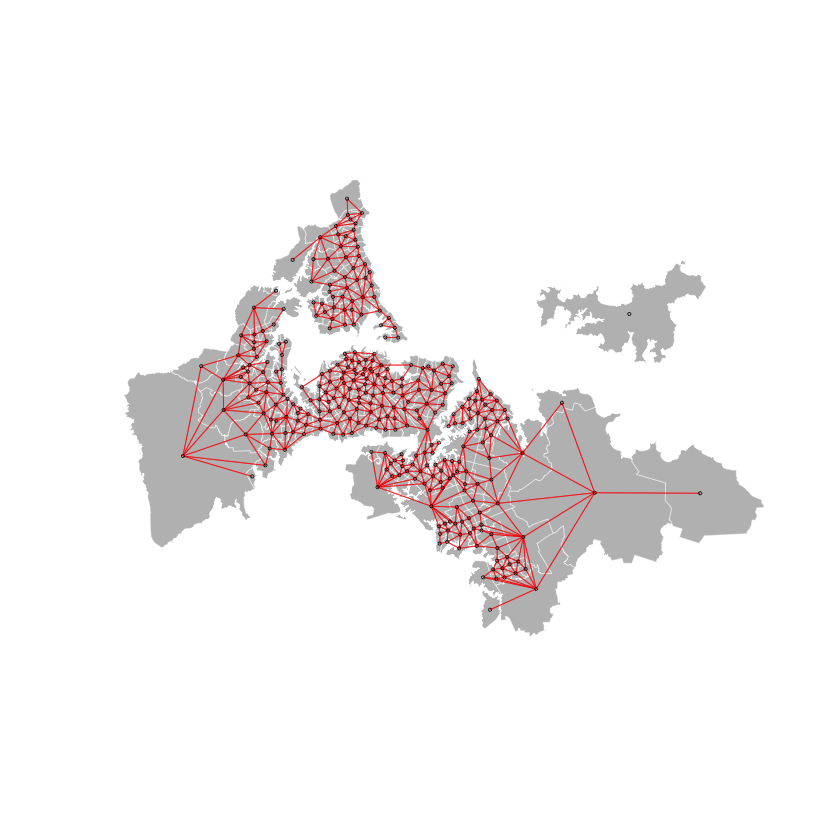

In [31]:
plot(auck, col='gray', border='white', lwd=0.35)
xy <- coordinates(auck)
plot(nb, xy, col='red', cex=0.35, lwd=0.5, add=TRUE)

## Moran's *I* in equation form

$I = \frac{n}{\sum_{i=1}^n (y_i - \bar{y})^2} \frac{\sum_{i=1}^n \sum_{j=1}^n w_{ij}(y_i - \bar{y})(y_j - \bar{y})}{\sum_{i=1}^n \sum_{j=1}^n w_{ij}}$

In [ ]:
# Let's first see what manual computation of Moran's I looks like

#n is the number of observations (length of our dataset)
# n <- length(auck)

#we set y to the column of PC_ASIAN, then we get the mean.
# y <- auck$PC_ASIAN
# ybar <- mean(y)

#find the difference between y and ybar(the mean)
# dy <- y - ybar
# yi <- rep(dy, each=n)
# yj <- rep(dy)
# yiyj <- yi * yj

# pm <- matrix(yiyj, ncol=n)

# pmw <- pm * wm

# spmw <- sum(pmw)

# smw <- sum(wm)
# sw  <- spmw / smw
# vr <- n / sum(dy^2)
# MI <- vr * sw

#Morans I
# cat("Moran's I is", MI)

In [ ]:
# let's make a weights object so that we 
# can use it with a less manual way of computing moran's i
lw <- nb2listw(nb, style="W", zero.policy=TRUE)
print(lw, zero.policy=TRUE)

In [ ]:
summary(lw, zero.policy=TRUE)

In [ ]:

m_scatterplot <- function (sf, varname, listweights, ttl='', linecol='red') {
    
scaled_col <- paste('s', varname, sep='')
lagged_col <- paste('lag', varname, sept='')
    
sf$scaled_col <- scale(sf[[varname]]) 
#sf$scaled_col_name
    
sf$lagged_col <- lag.listw(listweights, sf[[scaled_col]], zero.policy=TRUE)
#sf$lagged_col

plot(x=sf$scaled_col, y=sf$lagged_col, main=ttl)
    
abline(h=0, v=0)
best_fit_line <- lm(sf$lagged_col ~ sf$scaled_col)
abline(best_fit_line, lty=2, lwd=1, col=linecol)
    
# #Note that the slope of the regression line is nearly the same as Moran's I
coefficients(best_fit_line)[2]
    
}

In [ ]:
#Call the function to make the plot
m_scatterplot(auck, 'ASI_06', lw, ttl='Moran Scatterplot Percent Asian', linecol='red')


In [ ]:
moran(auck$ASI_06, lw, n=length(lw$neighbours), S0=Szero(lw), NAOK=TRUE, zero.policy=TRUE)

In [ ]:
moran.test(auck$ASI_06, lw, randomisation=FALSE, zero.policy=TRUE)

In [ ]:
mmc <- moran.mc(auck$ASI_06, lw, nsim=999, zero.policy=TRUE)

In [ ]:
hist(mmc$res, main="Histogram of results from permutation", xlab="Moran's index")
abline(v=mmc$statistic, col='red', lty=2)

# Univariate Local Moran’s I

In [ ]:
# We use the localmoran function instead of moran
locm <- localmoran(auck$PC_ASIAN, lw)
summary(locm)

In [ ]:
auck$sLPC_ASIAN <- scale(auck$PC_ASIAN) 

auck$lag_LPC_ASIAN <- lag.listw(lw, auck$sLPC_ASIAN,zero.policy=TRUE)

plot(x = auck$sLPC_ASIAN, y = auck$lag_LPC_ASIAN, main = "Local Moran Scatterplot PC_ASIAN")
abline(h = 0, v = 0)
abline(lm(auck$lag_LPC_ASIAN ~ auck$sLPC_ASIAN), lty = 2, lwd = 1, col = "red")

#Note that the slope of the regression line is nearly the same as Moran's I
slope <- lm(auck$lag_LPC_ASIAN ~ auck$sLPC_ASIAN)
coefficients(slope)[2]


In [ ]:
sig <- 0.001
# identify the moran plot quadrant for each observation to make the cluster map
auck$QUAD_SIG <- NA
auck$QUAD_SIG[(auck$sLPC_ASIAN >= 0 & auck$lag_LPC_ASIAN >= 0) & (locm[, 5] <= sig)] <- 1
auck$QUAD_SIG[(auck$sLPC_ASIAN <= 0 & auck$lag_LPC_ASIAN <= 0) & (locm[, 5] <= sig)] <- 2
auck$QUAD_SIG[(auck$sLPC_ASIAN >= 0 & auck$lag_LPC_ASIAN <= 0) & (locm[, 5] <= sig)] <- 3
auck$QUAD_SIG[(auck$sLPC_ASIAN <= 0 & auck$lag_LPC_ASIAN >= 0) & (locm[, 5] <= sig)] <- 4
auck$QUAD_SIG[(locm[, 5] > sig)] <- 5  
#5 are non significant observations

In [ ]:
# Set the breaks for the thematic map classes
# We use the seq function to generation a sequence from 1-5, going up by 1.
# you could also use 
breaks <- 1:6

# Set the corresponding labels for the thematic map classes
labels <- c("High-High", "Low-Low", "High-Low", "Low-High", "Not Signif.")

# Define color swatches
pal <- c("red", "blue", "lightpink", "skyblue2", "white")

# Generate the map
spplot(auck, "QUAD_SIG", at=breaks, col.regions=pal, main=list(label="Local Moran's I, LISA Cluster Map",cex=1))